In [1]:
from matplotlib import image as img
from matplotlib import pyplot as plt
import numpy as np


1. With the help of the matplotlib library I read the image and saved it as an numpy array (matric) and displayed the image.

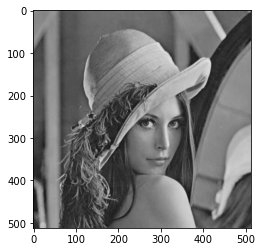

In [261]:
image = np.array(img.imread("cardsabz.jpg"))
plt.imshow (imm, cmap='gray', vmin=0, vmax=255)



2. Initializing the averaging filter :

In [262]:
array = np.ones((3,3))
averaging_filter = np.multiply(array, 1/9)

3. padding the image with 1s on all sides with the help of pad function from numpy library :

In [263]:
image_padd = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
image_padd[1:-1, 1:-1] = image
##image_padded = np.pad(image, 1, mode= 'constant')

4. convolve function takes an image and a filter as the input and returns the convulution of them.
 - Image and av_filter are both numpy arrays
 - The out put is also a numpy array of size [image_height, image_width]
 - The image is padded before convolution

In [264]:
def convolve(image, av_filter):

    # Flip the averaging filter
    av_filter = np.flipud(np.fliplr(av_filter))
    
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image
    
    # convolution output
    output = np.zeros_like(image_padded)
    
    # Loop over every pixel of the image
    for i in range(image.shape[1]):
        for j in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[j, i]=(av_filter * image_padded[j: j+3, i: i+3]).sum()

    return output


5. Here, you can see the result of applying the filter once. Also, with the help of subplot, I displayed the original and blurred images side by side:

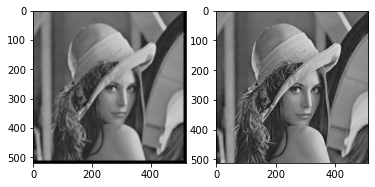

In [265]:
image2 = convolve(image,averaging_filter)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax2 = fig.add_subplot(1,2,1)
ax2.imshow(image21, cmap='gray', vmin=0, vmax=255)

6. applying the filter more times, makes the image more blurred and faded:

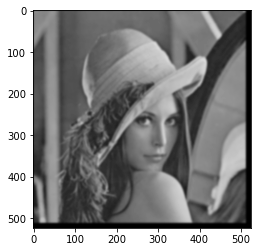

In [259]:
image3 = convolve(image,averaging_filter)
i=0
while i<5:
    image3 = convolve(image3,averaging_filter)
    i+=1
plt.imshow (image3, cmap='gray', vmin=0, vmax=255)